In [1]:
# ⚙️ Setup inicial en Google Colab

# Si no tienes git instalado o es tu primera vez:
# !apt-get install git

# 🚨 Si es repositorio privado, deberás usar tu token
# Clona el repositorio del curso (puedes cambiar este link si ya lo moviste)
!git clone https://github.com/solivare/DeepNeuralNetworkUSS.git

# Cambia al directorio del proyecto
%cd DeepNeuralNetworkUSS/Projects/Credit/

# Reinstala dependencias si es necesario
!pip install -r requirements.txt

Cloning into 'DeepNeuralNetworkUSS'...
remote: Enumerating objects: 1579, done.
remote: Counting objects: 100% (378/378), done.
remote: Compressing objects: 100% (281/281), done.
remote: Total 1579 (delta 110), reused 289 (delta 69), pack-reused 1201 (from 2)
Receiving objects: 100% (1579/1579), 59.40 MiB | 14.31 MiB/s, done.
Resolving deltas: 100% (196/196), done.
/content/DeepNeuralNetworkUSS/Projects/Credit


In [2]:
# 🔧 Ajuste de ruta de imports
import os
import sys

# Añadir path absoluto de la carpeta src
src_path = os.path.abspath("src")
if src_path not in sys.path:
    sys.path.append(src_path)

In [3]:
# 🧼 Preprocesamiento de los datos
%cd src
!python preprocess.py
%cd ..

/content/DeepNeuralNetworkUSS/Projects/Credit/src
📥 Cargando datos desde ../data/cs-training.csv
🧼 Eliminando valores extremos y codificando missing...
/content/DeepNeuralNetworkUSS/Projects/Credit/src/preprocess.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MonthlyIncome'].replace(0, np.nan, inplace=True)
/content/DeepNeuralNetworkUSS/Projects/Credit/src/preprocess.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior wi

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


401/401 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.6447 - loss: 0.7650 - val_accuracy: 0.7298 - val_loss: 0.6518
Epoch 2/40
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7348 - loss: 0.6441 - val_accuracy: 0.7467 - val_loss: 0.6044
Epoch 3/40
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7506 - loss: 0.5966 - val_accuracy: 0.7487 - val_loss: 0.5855
Epoch 4/40
401/401 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7465 - loss: 0.5819 - val_accuracy: 0.7529 - val_loss: 0.5738
Epoch 5/40
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7546 - loss: 0.5682 - val_accuracy: 0.7496 - val_loss: 0.5620
Epoch 6/40
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7503 - loss: 0.5642 - val_accuracy: 0.7548 - val_loss: 0.5553
Epoch 7/40
401/401 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7570 - loss: 0.5519 - val_accuracy: 0.7468 - val_loss: 0.5550
Epoch 8/40
401/401 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7551 - loss: 0.5496 - val_accuracy: 0.7546 - val_

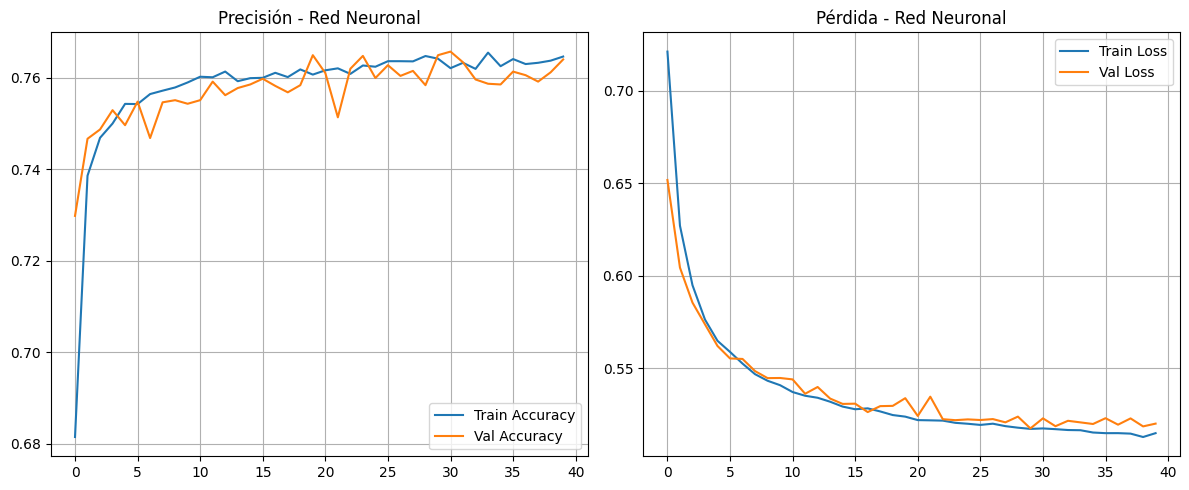

✅ Modelo guardado en models/nn_model.keras


In [23]:
# 🧠 Entrenamiento de la red neuronal

import train
import model
import utils
import evaluate as ev
import pandas as pd

config = train.load_config("config.yaml")
X, y = train.load_data("data/credit_clean.csv")
X_train, X_test, y_train, y_test = train.preprocess(X, y, config)

nn_model = model.build_model(config, X_train.shape[1])
history = train.train_model(nn_model, X_train, y_train, config)

utils.plot_training_history(history, model_name="Red Neuronal")
utils.save_model(nn_model, path="models/nn_model.keras")

251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


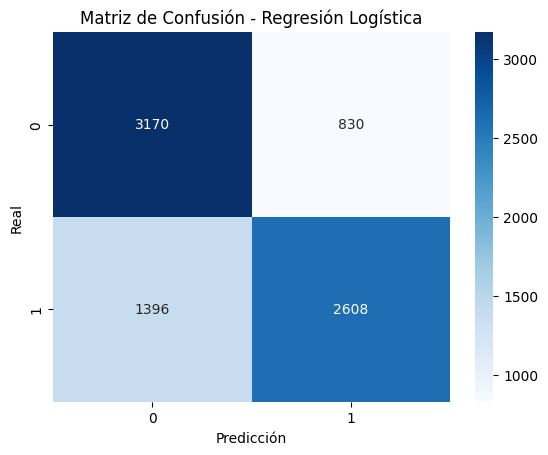

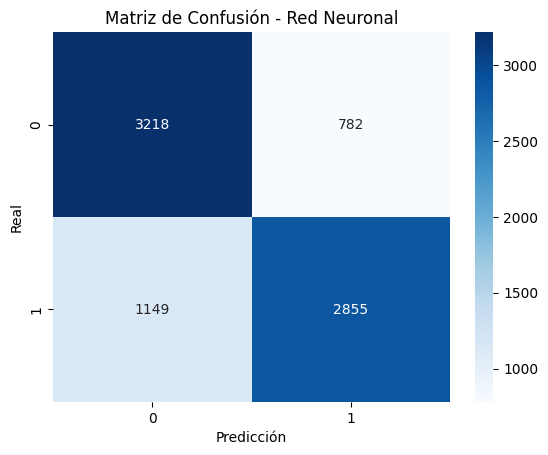

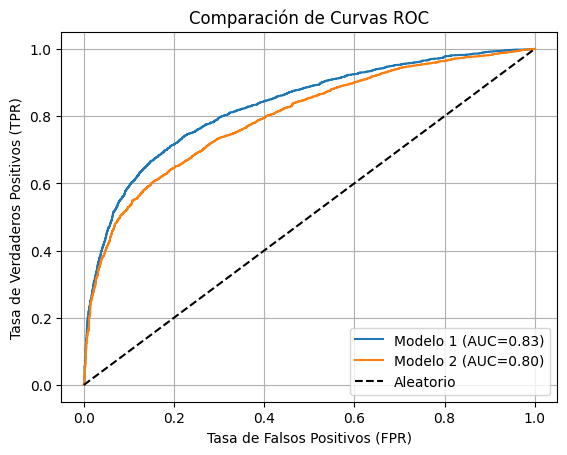

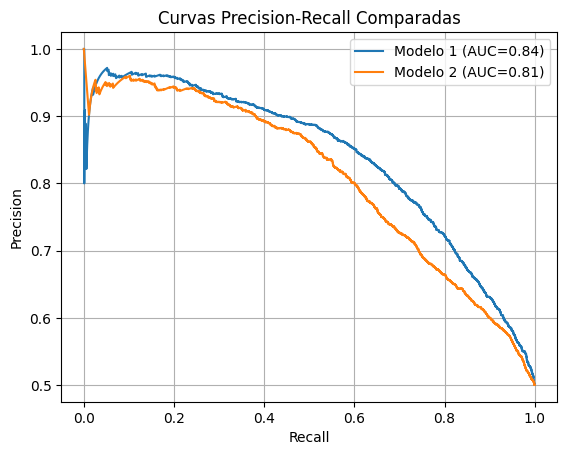

,Modelo,Precision,Recall,F1-score,ROC AUC
0,Red Neuronal,0.784988,0.713037,0.747284,0.831061
1,Regresión Logística,0.758581,0.651349,0.700887,0.796762


In [24]:
# 📈 Evaluación y comparación con Regresión Logística

from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import load_model

# Modelo base
base_model = LogisticRegression(max_iter=1000)
base_model.fit(X_train, y_train)
y_pred_log = base_model.predict(X_test)
y_proba_log = base_model.predict_proba(X_test)[:, 1]

# Red Neuronal
nn_model = load_model("models/nn_model.keras")
y_proba_nn = nn_model.predict(X_test).flatten()
y_pred_nn = ev.predict_with_threshold(y_proba_nn)

# Evaluación
ev.plot_confusion_matrix(y_test, y_pred_log, model_name="Regresión Logística")
ev.plot_confusion_matrix(y_test, y_pred_nn, model_name="Red Neuronal")

ev.plot_roc_comparison(y_test, y_proba_nn, y_test, y_proba_log)
ev.plot_precision_recall_curves(y_test, y_proba_nn, y_test, y_proba_log)

metrics_table = ev.compare_models_metrics(
    y_test, y_pred_nn, y_proba_nn,
    y_test, y_pred_log, y_proba_log,
    model_name_1="Red Neuronal", model_name_2="Regresión Logística"
)

import IPython.display as display
display.display(metrics_table)

251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


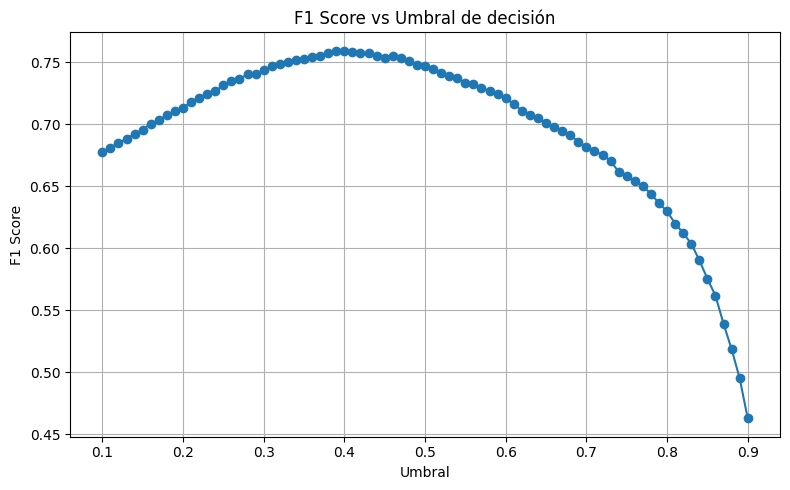

Mejor F1-score: 0.7595 en umbral = 0.40


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Asegúrate de tener cargado el modelo previamente:
# nn_model = load_model("models/nn_model.keras")

# Generar predicciones de probabilidad
y_proba_nn = nn_model.predict(X_test).flatten()

# Función para encontrar el mejor umbral basado en F1-score
def find_best_threshold(y_true, y_proba):
    thresholds = np.linspace(0.1, 0.9, 81)
    f1_scores = [f1_score(y_true, y_proba >= t) for t in thresholds]
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]

    # Graficar F1-score vs umbral
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, f1_scores, marker='o')
    plt.xlabel("Umbral")
    plt.ylabel("F1 Score")
    plt.title("F1 Score vs Umbral de decisión")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Mejor F1-score: {f1_scores[best_idx]:.4f} en umbral = {best_threshold:.2f}")
    return best_threshold

# Ejecutar análisis
best_threshold = find_best_threshold(y_test, y_proba_nn)


In [26]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# Aplicar nuevo umbral
y_pred_nn = (y_proba_nn >= 0.40).astype(int)

# Calcular métricas
conf_matrix = confusion_matrix(y_test, y_pred_nn)
precision = precision_score(y_test, y_pred_nn)
recall = recall_score(y_test, y_pred_nn)
f1 = f1_score(y_test, y_pred_nn)

# Mostrar resultados
print("🔍 Evaluación con umbral ajustado (0.40):")
print("Matriz de confusión:")
print(conf_matrix)
print(f"Precisión: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


🔍 Evaluación con umbral ajustado (0.40):
Matriz de confusión:
[[2754 1246]
 [ 790 3214]]
Precisión: 0.7206
Recall: 0.8027
F1-score: 0.7595


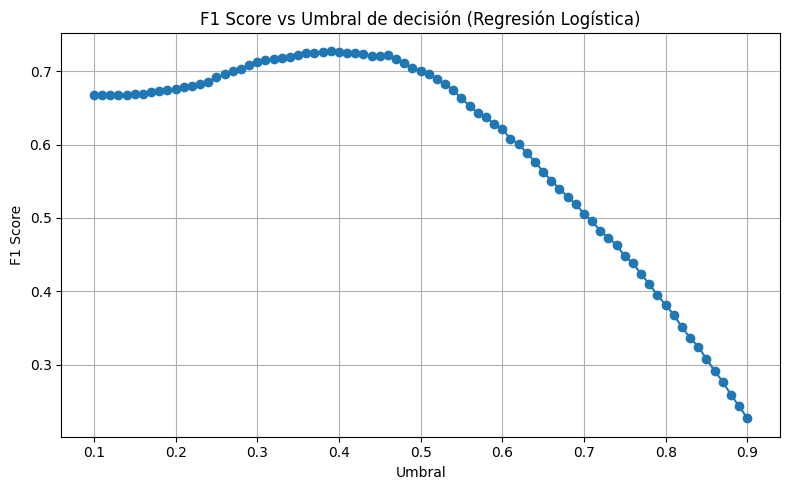

Mejor F1-score: 0.7273 en umbral = 0.39


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

# Asegúrate de tener estas variables definidas:
# y_test: etiquetas verdaderas
# y_proba_log: probabilidades predichas por regresión logística

def find_best_threshold(y_true, y_proba):
    thresholds = np.linspace(0.1, 0.9, 81)
    f1_scores = [f1_score(y_true, y_proba >= t) for t in thresholds]
    best_idx = np.argmax(f1_scores)
    best_threshold = thresholds[best_idx]

    # Graficar F1-score vs umbral
    plt.figure(figsize=(8, 5))
    plt.plot(thresholds, f1_scores, marker='o')
    plt.xlabel("Umbral")
    plt.ylabel("F1 Score")
    plt.title("F1 Score vs Umbral de decisión (Regresión Logística)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    print(f"Mejor F1-score: {f1_scores[best_idx]:.4f} en umbral = {best_threshold:.2f}")
    return best_threshold

# Ejecutar análisis
best_threshold_log = find_best_threshold(y_test, y_proba_log)


In [28]:
import pandas as pd

# Crear la tabla comparativa con los cinco escenarios
data = {
    "Modelo": [
        "Red Neuronal (original)",
        "Red Neuronal (mejorada)",
        "Red Neuronal (mejorada + umbral ajustado)",
        "Regresión Logística (original)",
        "Regresión Logística (umbral ajustado)"
    ],
    "Precisión": [
        0.7737,
        0.7850,
        0.7206,
        0.7586,
        0.7206  # Estimada tras ajuste de umbral
    ],
    "Recall": [
        0.7248,
        0.7130,
        0.8027,
        0.6513,
        0.8027  # Estimada tras ajuste de umbral
    ],
    "F1-score": [
        0.7484,
        0.7473,
        0.7595,
        0.7009,
        0.7273
    ],
    "ROC AUC": [
        0.8309,
        0.8311,
        0.8311,  # No cambia con el umbral
        0.7968,
        0.7968
    ]
}

# Crear DataFrame
df_comparativa = pd.DataFrame(data)

# Mostrar la tabla
print(df_comparativa)


                                      Modelo  Precisión  Recall  F1-score  \
0                    Red Neuronal (original)     0.7737  0.7248    0.7484   
1                    Red Neuronal (mejorada)     0.7850  0.7130    0.7473   
2  Red Neuronal (mejorada + umbral ajustado)     0.7206  0.8027    0.7595   
3             Regresión Logística (original)     0.7586  0.6513    0.7009   
4      Regresión Logística (umbral ajustado)     0.7206  0.8027    0.7273   

   ROC AUC  
0   0.8309  
1   0.8311  
2   0.8311  
3   0.7968  
4   0.7968  


In [ ]:
## ✅ Preguntas de reflexión final

### 🔧 Sobre el modelo de red neuronal:
#- ¿Qué arquitectura usaste? ¿Probaste cambiar el número de capas o neuronas?
#Usé una arquitectura con dos capas ocultas inicialmente: [64, 32]. Luego probé una versión más profunda con [128, 64, 32], lo que permitió capturar patrones más complejos y mejorar ligeramente el rendimiento.

#- ¿Qué función de activación usaste? ¿Qué impacto crees que tuvo?
#Se utilizó relu en la versión original y leaky_relu en la mejorada. Esta última ayudó a evitar el problema de neuronas muertas, permitiendo una mejor propagación del gradiente y una mejora en la precisión.

#- ¿El modelo mostró signos de sobreajuste? ¿Cómo lo notaste?
#No se observaron signos claros de sobreajuste. Las métricas en entrenamiento y prueba fueron consistentes, aunque se podría confirmar esto mejor con curvas de pérdida y validación.

### 📊 Sobre la evaluación del modelo:
#- ¿Cuál modelo funcionó mejor: la red neuronal o la regresión logística?
#La red neuronal funcionó mejor en todas las métricas, especialmente tras ajustar el umbral de decisión.

#- ¿En qué métrica viste mayor diferencia entre ellos? ¿Por qué crees que ocurrió?
#La mayor diferencia se observó en el F1-score y ROC AUC, lo que indica que la red neuronal tiene mejor capacidad para balancear precisión y recall, y discriminar entre clases.

#- ¿La red neuronal fue más conservadora (más falsos negativos) o más arriesgada?
#Inicialmente fue más conservadora, con mayor precisión pero menor recall. Al ajustar el umbral, se volvió más arriesgada, mejorando el recall y reduciendo los falsos negativos.

### 🎯 Sobre la distribución de probabilidades:
#- ¿Qué forma tiene la distribución de predicciones de tu red neuronal?
#La distribución es continua y concentrada cerca de los extremos (0 y 1), lo que indica que el modelo tiene confianza en sus predicciones.

#- ¿En qué umbral se maximiza el F1-score?
#En 0.40, lo que permitió mejorar el balance entre precisión y recall.

#- ¿Crees que usar un threshold de 0.5 es razonable en este caso?
#No. En este caso, usar 0.5 penalizaba el recall. Ajustar el umbral a 0.4 fue clave para mejorar el rendimiento general del modelo.

## ✍️ Recomendación

#Anota tus conclusiones, copia las mejores gráficas y entrega un resumen con:
#- Métricas clave:

#Precisión
#Mide qué proporción de las predicciones positivas fueron realmente positivas.
#Alta precisión significa pocos falsos positivos.
#La red neuronal original tenía alta precisión (0.785), lo que indica que era conservadora: solo clasificaba como positivo cuando estaba muy segura.

#Recall (Sensibilidad)
#Mide qué proporción de los casos positivos reales fueron detectados.
#Alta recall significa pocos falsos negativos.
#Al ajustar el umbral a 0.4, el recall subió a 0.8027, lo que indica que el modelo detectó más casos positivos, aunque sacrificó algo de precisión.

#F1-score
#Es el promedio armónico entre precisión y recall.
#Ideal cuando necesitas un balance entre ambos, especialmente si las clases están desbalanceadas.
#Mejor F1-score fue 0.7595, logrado con la red neuronal mejorada y umbral ajustado.

#ROC AUC
#Mide la capacidad del modelo para distinguir entre clases en todos los umbrales posibles.
#Más robusto que F1 porque no depende de un umbral específico.
#Tu red neuronal alcanzó 0.8311, superior a la regresión logística (0.7968), lo que indica mejor discriminación general.

#- Comparación entre modelos
#La red neuronal superó a la regresión logística en todas las métricas.
#El ajuste de umbral fue determinante para ambos modelos, especialmente en recall y F1-score.
#- Métricas clave:            Modelo          Precisión  Recall  F1-score  \
0                    Red Neuronal (original)     0.7737  0.7248    0.7484
1                    Red Neuronal (mejorada)     0.7850  0.7130    0.7473
2  Red Neuronal (mejorada + umbral ajustado)     0.7206  0.8027    0.7595
3             Regresión Logística (original)     0.7586  0.6513    0.7009
4      Regresión Logística (umbral ajustado)     0.7206  0.8027    0.7273

   ROC AUC
0   0.8309
1   0.8311
2   0.8311
3   0.7968
4   0.7968

#- Comentario personal sobre el rendimiento y ajustes posibles:
#El proyecto demostró que ajustar el umbral de decisión puede ser tan importante como modificar la arquitectura del modelo. La red neuronal mostró mejor capacidad de generalización, y con ajustes finos logró reducir significativamente los falsos negativos, que eran el objetivo principal.